In [8]:
import os 

path_with_videos = '/home/yulia/github/Project_DVCVQA_ver1/helping/download_videos_train_full/'
txt_file = '/home/yulia/github/Project_DVCVQA_ver1/helping/video_id_train_full.txt'

with open(txt_file, 'w') as f:
    for i in os.listdir(path_with_videos):
        f.write(i.split('.')[0] + '\n')

In [7]:
# caption embedding 

import numpy as np
import json
import os 
import pandas as pd
import csv
from pandas import Series, DataFrame
import re
import gensim
import numpy as np


def basic_clean_str(string):
    """Tokenization/string cleaning for a datasets.
    """
    string = re.sub(r"\n", " ", string)         # '\n'      --> ' '
    string = re.sub(r"\'s", " \'s", string)      # it's      --> it 's
    string = re.sub(r"\’s", " \'s", string)
    string = re.sub(r"\'ve", " have", string)   # they've   --> they have
    string = re.sub(r"\’ve", " have", string)
    string = re.sub(r"\'t", " not", string)    # can't     --> can not
    string = re.sub(r"\’t", " not", string)
    string = re.sub(r"\'re", " are", string)    # they're   --> they are
    string = re.sub(r"\’re", " are", string)
    string = re.sub(r"\'d", "", string)         # I'd (I had, I would) --> I
    string = re.sub(r"\’d", "", string)
    string = re.sub(r"\'ll", " will", string)   # I'll      --> I will
    string = re.sub(r"\’ll", " will", string)
    string = re.sub(r"\“", "  ", string)       # “a”       --> “ a ”
    string = re.sub(r"\”", "  ", string)
    string = re.sub(r"\"", "  ", string)       # "a"       --> " a "
    string = re.sub(r"\'", "  ", string)        # they'     --> they '
    string = re.sub(r"\’", "  ", string)        # they’     --> they ’
    string = re.sub(r"\.", " . ", string)       # they.     --> they .
    string = re.sub(r"\,", " , ", string)        # they,     --> they ,
    string = re.sub(r"\!", " ! ", string)
    string = re.sub(r"\(", "  ", string)       # (they)    --> ( they)
    string = re.sub(r"\)", "  ", string)       # ( they)   --> ( they )
    string = re.sub(r"\]", "  ", string)       # they]     --> they ]
    string = re.sub(r"\[", "  ", string)       # they[     --> they [
    string = re.sub(r"\?", "  ", string)       # they?     --> they ?
    string = re.sub(r"\>", "  ", string)       # they>     --> they >
    string = re.sub(r"\<", "  ", string)       # they<     --> they <
    string = re.sub(r"\=", "  ", string)        # easier=   --> easier =
    string = re.sub(r"\;", "  ", string)        # easier;   --> easier ;
    string = re.sub(r"\;", "  ", string)
    string = re.sub(r"\:", "  ", string)        # easier:   --> easier :
    string = re.sub(r"\"", "  ", string)      # easier"   --> easier "
    string = re.sub(r"\$", "  ", string)       # $380      --> $ 380
    string = re.sub(r"\_", "  ", string)        # _100     --> _ 100
    return string.strip().lower()               # lowercase

def prune_embedding(vocab_path, glove_path, embedding_path):

    glove_model = gensim.models.KeyedVectors.load_word2vec_format(glove_path, binary=True)  
    print(glove_model['with'].shape)

def average_word(model, vocab):
    
    word_vector = np.zeros(300)
    i = 0 
    for word in vocab.keys():
        if word in model:
            word_vector += model[word]
            i += 1 
            
    return word_vector/i

   
def preprocess_caption(sentence):
    
    sentence = basic_clean_str(sentence)
    punctuations = [':', '!', '?', '.', ';', '(', ')', '-', '_', '\n', '$', '.', ' . ']
    # remove all punctuations
    for p in punctuations:
        sentence = sentence.replace(p, '')  # some notation should be kept in the vocab
        
    return sentence.lower().split()

def preprocess_question(sentence):
    
    sentence = basic_clean_str(sentence)
    punctuations = [':', '!', '?', '.', ';', '(', ')', '-', '_', '\n', '$', '.', ' . ']
    # remove all punctuations
    for p in punctuations:
        sentence = sentence.replace(p, '')  # some notation should be kept in the vocab
        
    return sentence.lower().strip()


def caption_embedding(list_captions):
    max_word = 0 
    list_words = []
    for i in range(len(list_captions)):
        processed_caption = preprocess_caption(list_captions[i])
        num_words = 0 
        for word in processed_caption:
            if len(word) >= 2:
                vocab[word] = vocab.get(word, 0) + 1
            num_words += 1
        list_words.append(num_words)      
        if(max_word < num_words): max_word = num_words
#         if(num_words > 66) : print(processed_caption)
    
    return vocab, max_word, list_words


resFile_video = '/home/yulia/github/Activity_net_whole/train_qa.json'
data = json.load(open(resFile_video))
caption_info = data['caption_info']
videos = caption_info.items()
max_num_captions = 12

list_of_clips = []
directory = '/home/yulia/github/Project_DVCVQA_ver1/helping/download_videos_train/'
vocab_path = '/home/yulia/github/Project_DVCVQA_ver1/helping/data/vocab.txt'
embedding_path = '/home/yulia/github/Project_DVCVQA_ver1/helping/data/word_embedding.npy'

video_id_train = open("video_id_train_full.txt","r")
caption_list_all = []
vocab = dict()

for video_id in video_id_train:
    video_path = os.path.join(directory, video_id[:-1] + '.avi')
    video_id = 'v_' + video_id[:-1]
    list_timestamps = caption_info[video_id]['timestamps']
    list_captions = caption_info[video_id]['sentences']
    
    
    for i in range(len(list_captions)):
        caption_list_all.append(list_captions[i])
    
vocab, max_word, list_words = caption_embedding(caption_list_all)
values, counts = np.unique(list_words, return_counts=True)
print(values)
print(counts)

ques_video = '/home/yulia/github/Activity_net_whole/activitynet-qa/dataset/train_q.json'
ques_info_data = json.load(open(ques_video))

question_list = []
video_id2question_id = {}
question_id2question_text = {}
question_text2question_id = {}
question_text2file = {}    

video_id_train = open("video_id_train_full.txt", "r")
video_ids = ['v_' + video_id[:-1] for video_id in video_id_train]

counter = 0 
counter2question_text = {}
for i in range(len(ques_info_data)):
    video_id = 'v_' + ques_info_data[i]['video_name']
    question_id = ques_info_data[i]['question_id']
    question_text = preprocess_question(ques_info_data[i]['question'])
    if video_id in video_ids:
        video_id2question_id[video_id] = question_id
        question_id2question_text[question_id] = question_text
        question_text2question_id[question_text] = question_id
        if question_text not in question_text2file.keys():
            question_list.append(question_text)
            question_text2file[question_text] = question_text            

vocab1, max_word1, list_words1 = caption_embedding(question_list)
values1, counts1 = np.unique(list_words1, return_counts=True)            

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48 49 51 52 53
 54 56 57 59 60 61 62 64 65 66 67 76]
[ 12 226 550 735 900 828 861 826 733 746 643 640 572 495 488 376 281 268
 209 168 133 100  62  60  46  30  39  49  27  17  16  15  12   8   7  11
  12   8   4   7   4   5   4   5   2   4   1   2   1   3   2   1   2   1
   1   1   2   1   1   1]


640
15


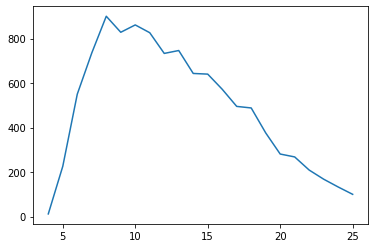

In [35]:
import matplotlib.pyplot as plt 
%matplotlib inline
print(counts[11])
print(values[11])

plt.plot(values[:22], counts[:22])
plt.show()

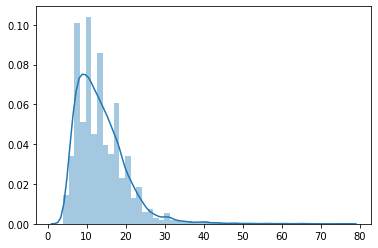

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
x = np.random.normal(size=100)
sns.distplot(list_words);

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 24 27]
[  12  202  768  942 1830 2982 2601 2773 2453 1551  943  548  192   91
   49   23    7    2    1    1]


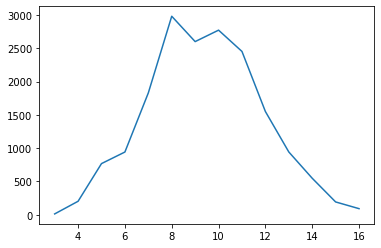

In [11]:
#question
import matplotlib.pyplot as plt 
%matplotlib inline
print(values1)
print(counts1)

plt.plot(values1[:14], counts1[:14])
plt.show()

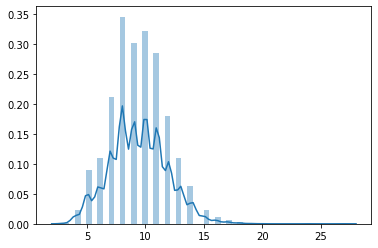

In [10]:
#question
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
x = np.random.normal(size=100)
sns.distplot(list_words1);